# Assignment 1 - Julia_Exercises_Section_2.5

### Julia Exercise 2.5.1 – Visualising Sampled Sinusoid


Simulate a sinusoidal signal over enough time to see several cycles. Specify the frequency f0 Hz of the sine wave,
the sample rate fs in samples per second, start time and stop time. Include about 10 cycles.
Plot the sampled waveforms in order to show the visual effect of sampling at

In [1]:
using Pkg
using PyPlot
using FFTW

(a) 100x the Nyquist rate.

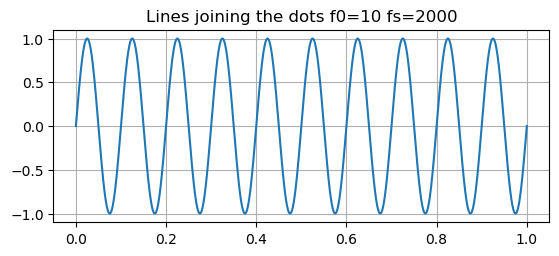

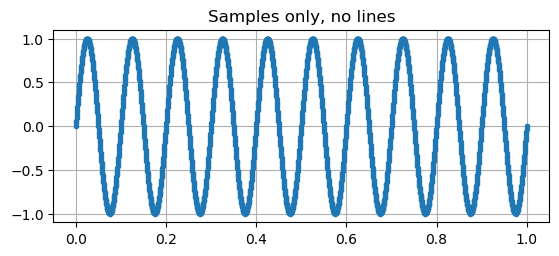

In [2]:
function myplot(k)
    f0 = 10
    
    fnyquist = 2*f0 # Calculate Nyquist rate
    fs = k*fnyquist # Define sample rate
    Δt = 1/fs
    t = 0:Δt:10/f0

    x = sin.(2π*f0*t) # Create array containing function to be plotted

    # using PyPlot
    myfigsize=(6.4,2.5); # figure size (default is 6.4 by 5.0)
    figure(figsize=myfigsize)
    plot(t,x)
    grid("on")
    title("Lines joining the dots f0=$(f0) fs=$(fs)")
    figure(figsize=myfigsize)
    plot(t,x,".")
    grid("on")
    title("Samples only, no lines")
end

myplot(100);


(b) 10x the Nyquist rate.

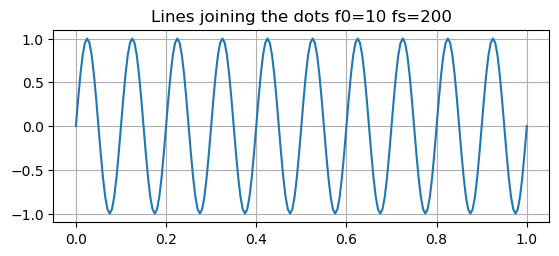

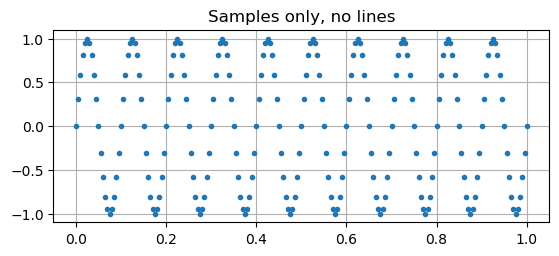

In [3]:
myplot(10);

(c) 2x the Nyquist rate.

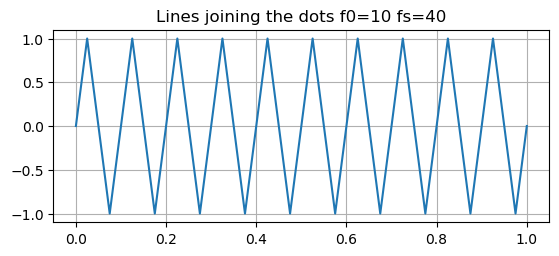

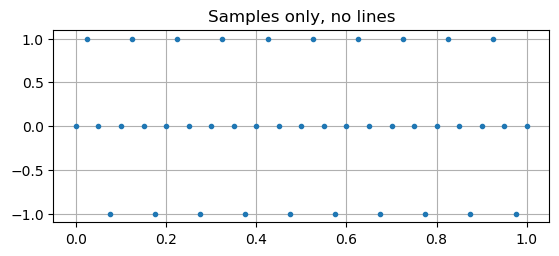

In [4]:
myplot(2);

(d) 1.1x the Nyquist rate.

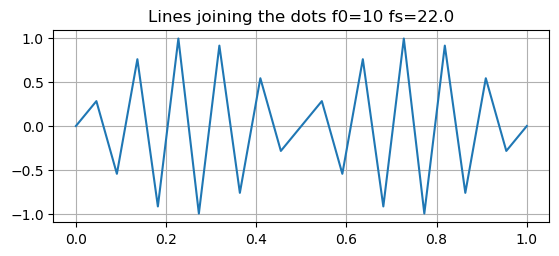

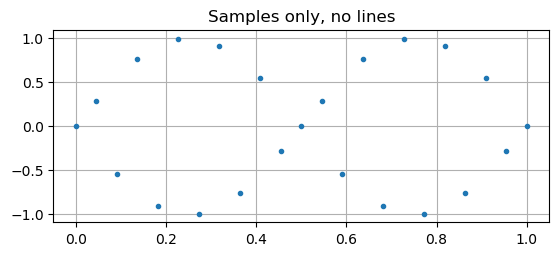

In [5]:
myplot(1.1);

(e) On the Nyquist rate.

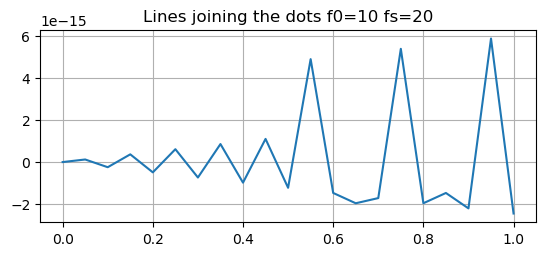

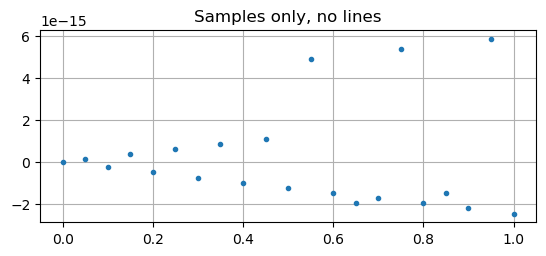

In [6]:
myplot(1);

(f) Below the Nyquist rate (try 0.7x, and 55x of the Nyquist rate). For these cases, calculate and display the frequency fs-f0

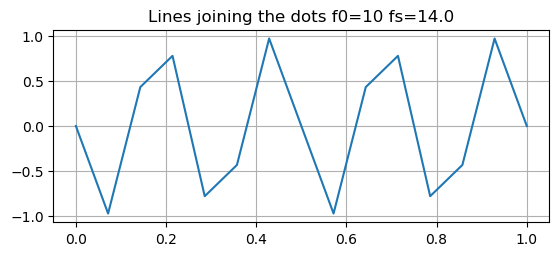

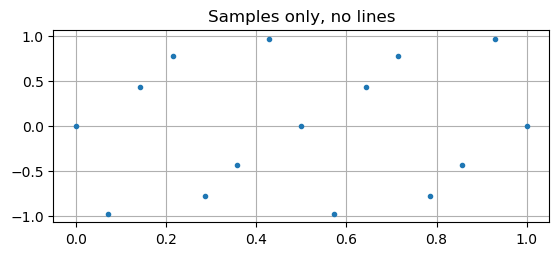

The Plots with 0.7x the Nyquist Rate fs - f0 = 4.0 Hz


In [7]:
myplot(0.7);
println("The Plots with 0.7x the Nyquist Rate fs - f0 = $(0.7 * 2 * 10 - 10) Hz");

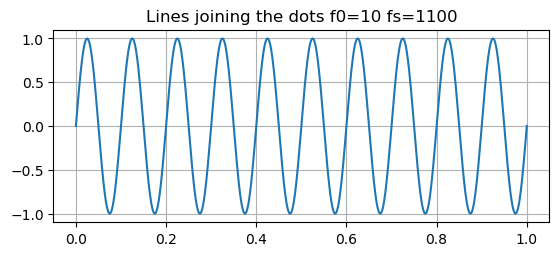

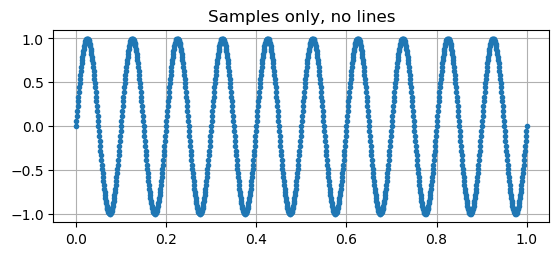

The Plots with 55x the Nyquist Rate fs - f0 = 1090 Hz


In [8]:
myplot(55);
println("The Plots with 55x the Nyquist Rate fs - f0 = $(55 * 2 * 10 - 10) Hz")

### Julia Exercise 2.5.2 – DFT / FFT introduction

In [9]:
function dft(x)
    N=length(x)
    X = zeros(N)+im*zeros(N) # Complex array of 0+0im; Another method is X=zeros(ComplexF64,N)
    for k=1:N
    for n=1:N
    X[k] = X[k] + x[n]*exp(-im*2*pi*(k-1)*(n-1)/N)
    end
    end
    return X
end;

a) Insert this dft(x) function into Julia and compare it to the fft( ) function.

In [10]:
x = [0,1,1,0,0,0,0,0]
[fft(x) dft(x)]

8×2 Array{Complex{Float64},2}:
       2.0+0.0im             2.0+0.0im
  0.707107-1.70711im    0.707107-1.70711im
      -1.0-1.0im            -1.0-1.0im
 -0.707107+0.292893im  -0.707107+0.292893im
       0.0+0.0im             0.0+1.22465e-16im
 -0.707107-0.292893im  -0.707107-0.292893im
      -1.0+1.0im            -1.0+1.0im
  0.707107+1.70711im    0.707107+1.70711im

b) Plot the magnitude and phase via

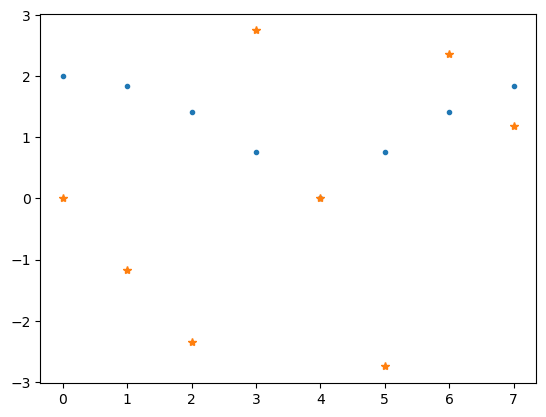

In [11]:
X = fft(x);
#using PyPlot
plot( abs.(X),".");
plot( angle.(X),"*");

c) Try the ifft function.


In [12]:
@show invX = ifft(X);
@show real(ifft(X));

invX = ifft(X) = Complex{Float64}[0.0 + 0.0im, 1.0 + 0.0im, 1.0 + 0.0im, -3.925231146709438e-17 + 0.0im, 0.0 + 0.0im, -2.910577510952485e-17 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im]
real(ifft(X)) = [0.0, 1.0, 1.0, -3.925231146709438e-17, 0.0, -2.910577510952485e-17, 0.0, 0.0]


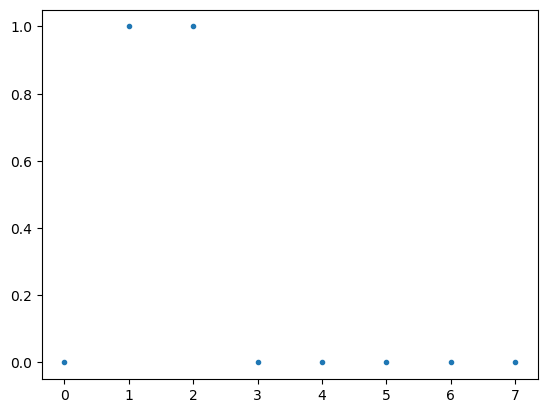

In [38]:
plot( abs.(invX),".");

d) Compare the speed of the dft() and fft() functions by timing doing some timing tests for different sizes of N.
The fft() algorithm is fast (order NlogN) compared to the direct double for-loop DFT implementation (order N^2).
Timing can be done using either the “@time” macro (which prints how long a function takes to evaluate, as well as memory used), or
the “@elapsed” macro which returns the time taken so that it can be stored in a variable

In [14]:
function timing_test(n)
    x = randn(n);
    t_dft = @elapsed dft(x);
    t_fft = @elapsed fft(x);
    println("dft of length $(n) took $(t_dft) seconds")
    println("fft of length $(n) took $(t_fft) seconds")
end;


In [15]:
N = 1024
timing_test(N);

dft of length 1024 took 0.032386499 seconds
fft of length 1024 took 0.0001217 seconds


In [16]:
# N=2^8 = 256, N=2^10 = 1024, N=2^11 = 2028, N=2^12 = 4096
N_sizes = [256, 1024, 2028, 4096]
for i in N_sizes
    timing_test(i)
end


dft of length 256 took 0.0020064 seconds
fft of length 256 took 9.34e-5 seconds
dft of length 1024 took 0.0322158 seconds
fft of length 1024 took 5.63e-5 seconds
dft of length 2028 took 0.132743201 seconds
fft of length 2028 took 0.0205189 seconds
dft of length 4096 took 0.5308758 seconds
fft of length 4096 took 0.000265199 seconds


Questions:

(1) What is the largest power-of-2 size fft() that one can compute within 1 second (on your platform)? 
What is the largest dft() size?

In [17]:
p = 12
t0 = @elapsed fft(randn(2^p))

while t0 < 1
    p = p + 1
    t0 = @elapsed fft(randn(2^p))
end

p1 = 12
t1 = @elapsed dft(randn(2^p1))

while t1 < 1
    p1 = p1 + 1
    t1 = @elapsed dft(randn(2^p1))
end



println("The largest for fft() is : 2^$(p1) = $(2^p1)")
println("The largest for dft() is : 2^$(p) = $(2^p)")

The largest for fft() is : 2^13 = 8192
The largest for dft() is : 2^24 = 16777216


(2) Is the fft() really faster for powers of two? Time the fft for N=2^15=32768 and for N=32767. Which is faster?

In [18]:
timing_test(2^15)

dft of length 32768 took 36.173059099 seconds
fft of length 32768 took 0.001411001 seconds


In [19]:
timing_test(32767)

dft of length 32767 took 37.3902274 seconds
fft of length 32767 took 0.0086613 seconds


2. Yes, fft is faster

### Julia Exercise 2.5.3 – FFT of a sine wave

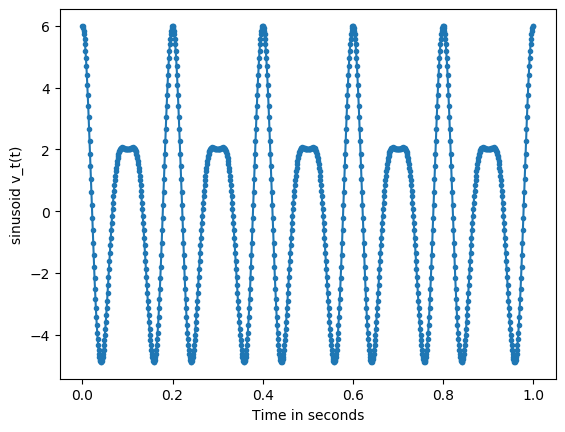

In [20]:
Δt = 0.001   
t = 0:Δt:1; 

f0 = 10  # 10 Hz
ω0 = 2*pi*f0;   # rad/s   ( Greek symbol \omega <tab>  )
A = 1

v_t(t) = (4. *cos.(20*π*t) + 2. *cos.(30*π*t));

#println("length(t) = ",length(t))

v_tt = v_t.(t)

#v = A.*cos.(t)   # Create an array holding the sinusoid values

figure()
plot(t,v_tt,".-")

xlabel("Time in seconds");
ylabel("sinusoid v_t(t)");



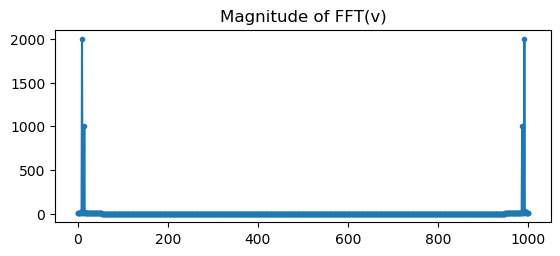

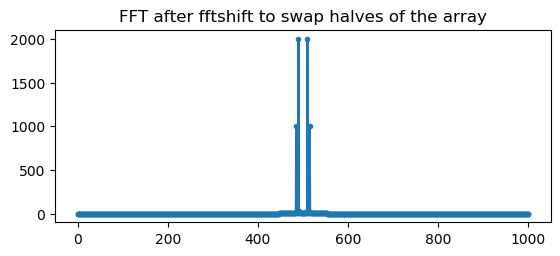

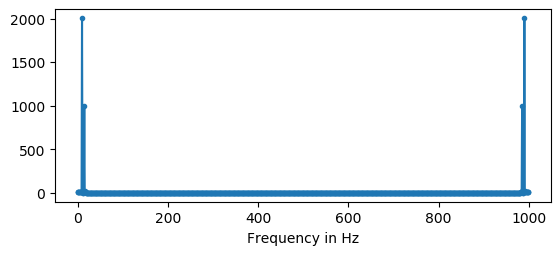

In [21]:
using FFTW   # Import Fourier library

V = fft(v_tt)

figure(figsize=(6.4,2.5));    # default is seems to be figsize=(6.4,5) 
plot(abs.(V),".-")  # Note elts 1:N/2 pos freq components; N/2+1:N contain neg freq components
title("Magnitude of FFT(v)")

figure(figsize=(6.4,2.5)); 
plot( fftshift(abs.(V)),".-")   # swap around halves of array so that plot show zero Hz in middle
title("FFT after fftshift to swap halves of the array");

#Label the frequency axis in Hz
N = length(t);
Δf = 1/(N*Δt)  # spacing in frequency domain


#create array of freq values stored in f_axis. First element maps to 0Hz
f_axis = (0:N-1)*Δf;    

figure(figsize=(6.4,2.5)); 
plot(f_axis, abs.(V),".-");
xlabel("Frequency in Hz");

b) Try zero padding in the time domain, i.e. extend the length of the time array by adding additional zeros.
This will give a finer sample spacing in the frequency domain.


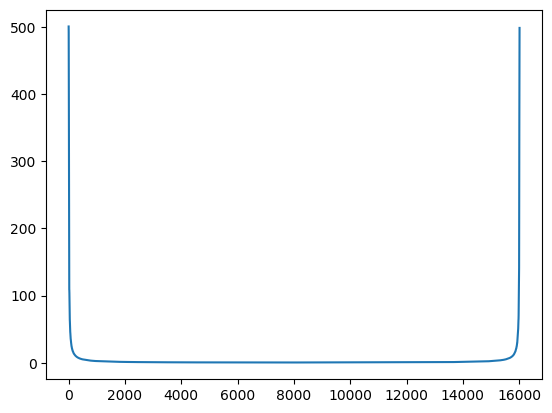

In [22]:
 #N = length(x)
 y = zeros(16*N) # Make array 16x longer.
 y[1:N] = t; # Copy x into first N samples. The rest contains zeros.
 Y = fft(y);
 plot(abs.(Y)); # Again, zoom in if required.


Question: What do you now clearly see at the locations of the two sinusoidal frequencies?

### Julia Exercise 2.5.4 – Effect of ADC quantization

Simulate a sinusoid voltage (as in the previous exercise). v = cos.(2*pi*f0*t)
The signal lies in the range: Amin = -0.5 to Amax = 0.5
Quantize the signal into 2^Nbits levels when Nbits is the number of bits of an ADC. 

In [23]:
v_t2(f0,t) = cos.(2*pi*f0*t);

In [24]:
f20 = 10
Δt2 = 0.001
t2 = -0.5:Δt2:0.5;

In [25]:
v_tt2 = v_t2.(f20, t2);

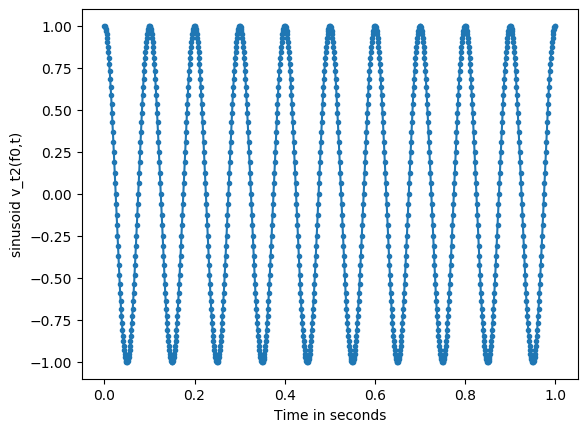

In [26]:
figure()
plot(t,v_tt2,".-")

xlabel("Time in seconds");
ylabel("sinusoid v_t2(f0,t)");

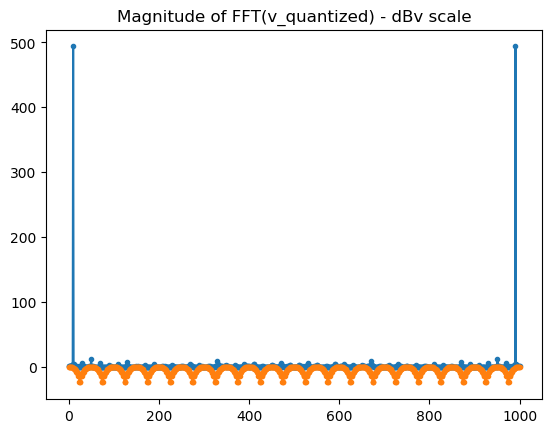

In [27]:
Nbits = 4 # Try 2, then 3, then 4 etc.
Nlevels = 2^Nbits
Amax = 1+0.00001 # Add a small amount to prevent problem at extreme
Amin = -1-0.00001
v_quantized = (round.( (v_tt2 .- Amin) ./(Amax-Amin)*Nlevels .- 0.5) .+0.5) /
Nlevels*(Amax-Amin) .+ Amin;
plot(abs.(fft(v_quantized)),".-")
# Try a dBv scale to see wide dynamic range.
plot(20*log10.(abs.(v_quantized)),".-");
title("Magnitude of FFT(v_quantized) - dBv scale");


Having done this, inspect in the time and frequency domains.
Question: what effect does this have in the frequency domain?

### Julia Exercise 2.5.5 – Simulating bandlimited noise

a) Try the following:


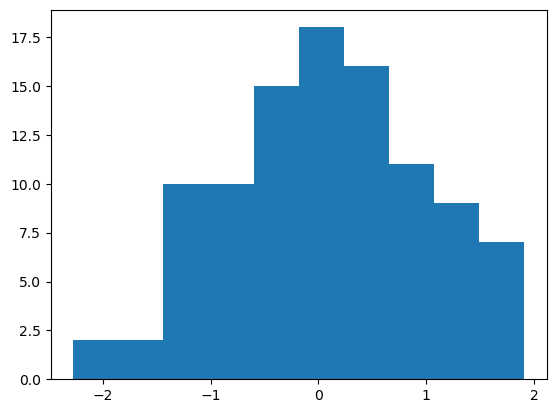

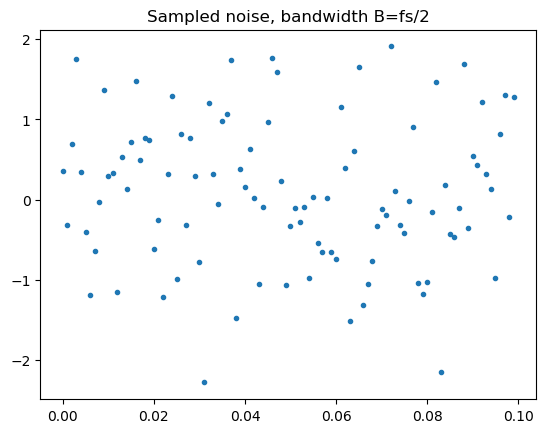

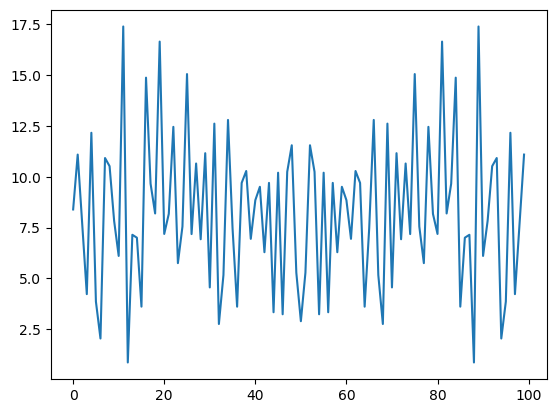

In [28]:
fs = 1000 # sample rate in Hz
Δt=1/fs; # sample spacing in s
N = 100 # Choose an even number (makes like easier later)
t = range(0, step=Δt, length=N) # Define time axis
σ = 1
x = σ * randn(N); # Create the random samples with std dev of σ.
figure(); hist(x,bins=10) # inspect histogram
figure(); plot(t,x,".") # inspect sampled time domain
title("Sampled noise, bandwidth B=fs/2")
X = fft(x);
figure(); plot(abs.(X)); # inspect DFT frequency domain


b) Zero-pad in frequency domain to get finer sample spacing in time domain (read lecture notes).
Run the code below to inspect the noise waveform resampled at 10x finer sample spacing.

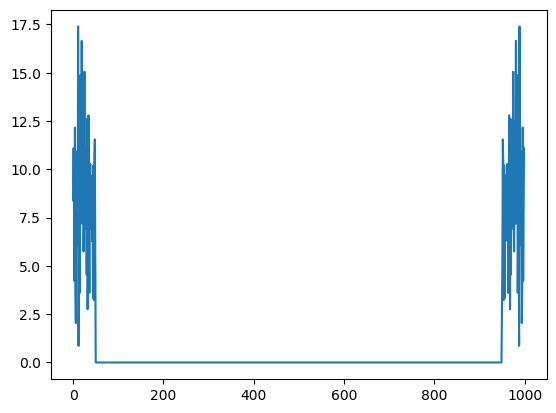

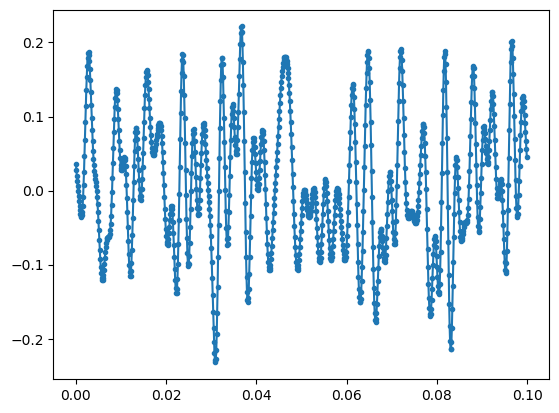

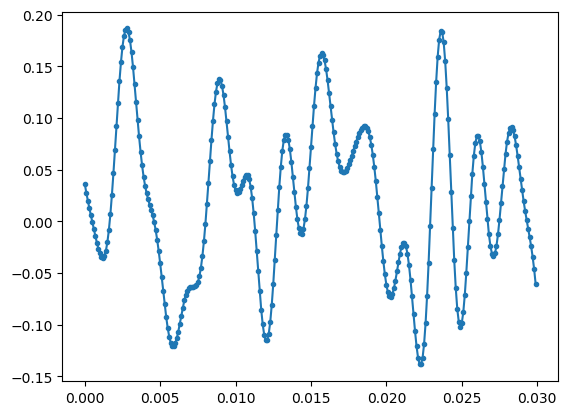

In [29]:
pad_factor=10
Ny = pad_factor*N;
Y = zeros(Ny)+im*zeros(Ny) # Create a complex array of zeros
k_mid = Int(N/2)
Y[1:k_mid]=X[1:k_mid]; # Insert the first half of X
Y[Ny-k_mid+1:Ny]=X[k_mid+1:N]; # Insert the 2nd half of X at the end
figure(); plot(abs.(Y)); # inspect padded array
y = ifft(Y); # Go back to time domain
y = real(y); # discard the very tiny imaginary components
Ny = length(y)
t_new = range(0, step=Δt/pad_factor, length=Ny) # Define time axis
figure(); plot(t_new,y,".-")
figure(); plot(t_new[1:300],y[1:300],".-"); # Plot just first 300 samples


c) Now try bandlimiting the noise using an ideal LPF. First create and display the filter. Then apply to the noise
waveform in the frequency domain. Here the bandwidth B=100Hz. The original bandwidth was fs/2=1000/2=500Hz.

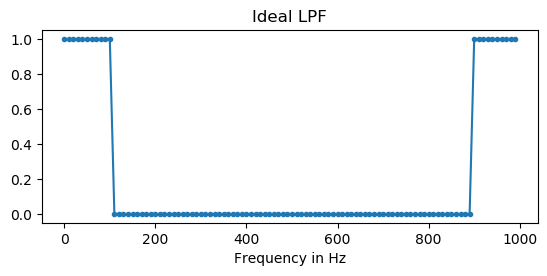

In [30]:
# Create a Filter transfer function
Δω = 2*pi/(N*Δt) # Sample spacing in freq domain in rad/s
ω = 0:Δω:(N-1)*Δω
f = ω/(2*π)
B = 100 # filter bandwidth in Hz
# In the sampled frequency domain. add a rect centred on zero to one centred at the next repeat
# i.e. centred on 0 rad/s an on 2pi/Δt rad/s.
rect(t) = (abs.(t).<=0.5)*1.0;
H = rect(ω/(4*π*B)) + rect( (ω .- 2*π/Δt)/(4*π*B) );
figure(figsize=(6.4,2.5));
plot(f,H,".-"); # Note, H in this case is purely real.
title("Ideal LPF")
xlabel("Frequency in Hz");

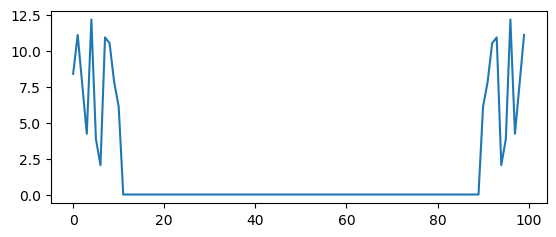

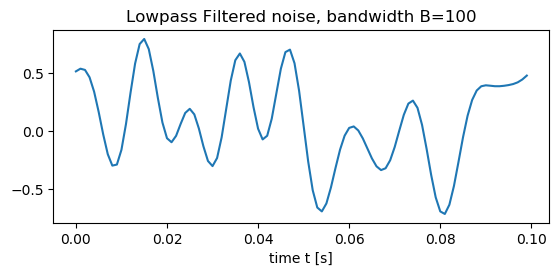

In [31]:
#Apply filter to noise:
X_filtered = X.*H;
figure(figsize=(6.4,2.5)); PyPlot.plot(abs.(X_filtered))
x_filtered = ifft(X_filtered)
x_filtered = real(x_filtered)
figure(figsize=(6.4,2.5)); PyPlot.plot(t,x_filtered)
title("Lowpass Filtered noise, bandwidth B=$(B)")
xlabel("time t [s]");

Note: compare this bandlimited noise to the original noise waveform (part a) in the time
domain.
How do the waveforms differ?
Calculate the standard deviations of each as a measure of spread.

### Julia Exercise 2.5.6 – Discrete fast convolution

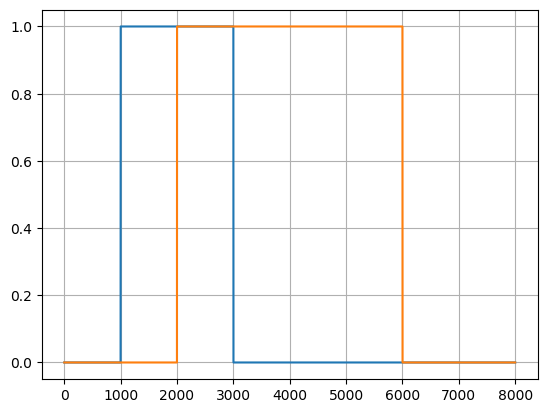

In [45]:
rect(t) = (abs.(t).<=0.5)*1.0;

dt = 0.001

tmax = 8
T = 2
t=0:dt:tmax
x =  rect( (t.-T)/T )
y = rect( (t.-2T)/(2T) ) 
z = ifft(fft(x).*fft(y)); 

plot(x)
plot(y)
grid("on")

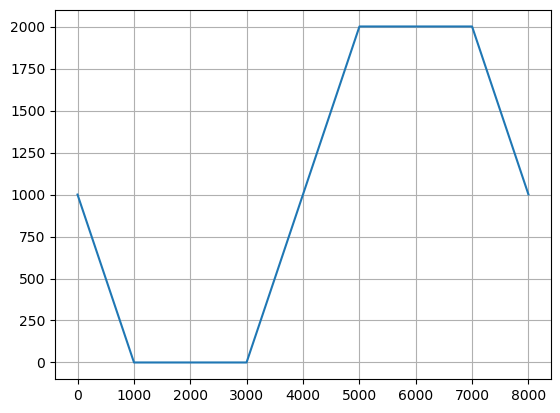

In [48]:
plot(real(z))
grid("on");